In [1]:
library(ComplexHeatmap)
library(ggplot2)
library(tidyr)
library(dplyr)

# set working directory
#setwd("/lustre/home/reynaj/Projects/20241011.Byrd_Lab.IBD_NuLisa")
setwd('/home/reynaj/projects/kevin_byrd/20241011.kevin_byrd.ibd_nulisa')

# set the outdir
#outdir = "results/aggregated/post_analysis/"
outdir = 'results/specimen_focused//comprehensive/'

Loading required package: grid

ComplexHeatmap version 2.22.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Load the datasets

In [2]:
fn <- "results/specimen_focused/comp_data/protein_levels.npq.tsv"
protein_data <- read.table(fn, header=TRUE, check.names=FALSE, sep = "\t")

fn <- "results/specimen_focused/comp_data/clinical_data.tsv"
clinical_data <- read.table(fn, header=TRUE, sep="\t")

# mod the ibd data
clinical_data$ibd_diagnosis <- factor(clinical_data$ibd_diagnosis, 
                                      levels = c("Alamar_Sample_Control", "Control", "CD", "UC", "IBD-U"))
clinical_data$ibd_indicator <- factor(clinical_data$ibd_indicator,
                                      levels = c("Control Super Group", "IBD Super Group"))

# mod the disease activity data
clinical_data$disease_activity <- factor(clinical_data$disease_activity, 
                                         levels = c("N/A", "N/A (Non-IBD Control)",
                                                    "Quiescent", "Mild", "Moderate"))
clinical_data$disease_activity_indicator <- factor(clinical_data$disease_activity_indicator,
                                                   levels=c("In-active Disease", "Active Disease"))

In [3]:
# load the important features
model_imp_df <- read.table('results/specimen_focused/rf_model/rf_model.disease_activity.scores.tsv',
                            sep='\t', header=TRUE)

In [4]:
topn = 30
model_imp_df <- model_imp_df %>% arrange(desc(score))
model_imp_df <- model_imp_df[0:topn,]

In [5]:
protein_data <- protein_data[row.names(protein_data) %in% model_imp_df$protein,]

In [6]:
protein_data

,TRP-34082,TRP-34086,TRP-42335,TRP-42324,TRP-42322,TRP-42320,TRP-42344-2,TRP-42346,TRP-42368-1,TRP-42362-1,⋯,TRIANGLE PEDS-003-48248-3,TRP-059-48247-3,TRP-061-48257-1,TRIANGLE PEDS-042-48265-3,TRP-063-48262-3,TRP-064-48267-3,TRP-067-48268-3,SC_Rep01,SC_Rep02,SC_Rep03
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C1QA,8.081331,8.589964,9.529024,0.000000,10.781654,11.623066,6.131300,8.412514,8.659381,11.872985,⋯,9.165756,11.753012,8.962350,7.723660,9.360695,9.829992,0.000000,13.64680,13.74813,13.66313
CCL16,0.000000,8.403839,5.498235,0.000000,0.000000,8.953453,7.837142,0.000000,0.000000,9.195381,⋯,7.720422,6.673267,7.558096,6.545702,0.000000,0.000000,7.099795,13.06517,13.27414,13.45687
CCL2,16.543130,17.169490,15.619680,14.814340,15.934120,19.907570,15.992750,15.887610,16.087540,16.810290,⋯,16.462640,16.113100,17.456250,16.941750,17.109560,16.768420,16.767100,12.32150,12.63721,12.92378
CCL24,9.127664,11.109887,12.313407,10.029251,6.506033,12.121006,11.330145,8.140555,8.125111,9.897667,⋯,8.047868,10.533196,10.617145,6.610819,8.242434,0.000000,10.271690,13.13097,13.19311,12.63673
CD200R1,9.026568,10.686899,11.238433,9.928068,11.637169,12.237289,0.000000,10.257722,8.437855,13.894500,⋯,7.364938,10.946243,8.518881,11.817026,8.555256,10.514163,10.277317,13.63649,13.89913,13.78613
CST7,12.191855,13.460887,13.016903,12.317008,13.485578,16.081442,11.669084,15.308848,13.318990,17.803557,⋯,12.643871,13.209984,13.383264,17.229972,12.760398,12.565684,13.558278,13.15507,12.86035,12.71019
CTLA4,8.001192,12.790006,9.212021,9.190315,12.142218,13.451726,10.668443,10.229496,10.549360,12.220096,⋯,11.415901,12.108730,9.074334,12.830052,9.525126,9.624260,9.612319,13.41313,12.84623,13.04885
CXADR,14.246460,13.812660,12.852010,13.459300,15.287730,16.127500,12.624610,14.575220,12.836840,15.952140,⋯,13.840130,14.732710,14.515200,14.305810,14.188680,14.628530,13.862570,13.06556,13.33865,13.29165
CXCL6,11.985500,15.033000,15.459110,14.262780,15.201550,17.506280,13.575290,12.253070,14.856360,17.370720,⋯,15.269110,19.731190,14.544720,16.433630,12.347410,12.872120,15.630800,10.55989,10.48286,10.63739


## Run hierarchical clustering on all samples

gTree[GRID.gTree.409] 

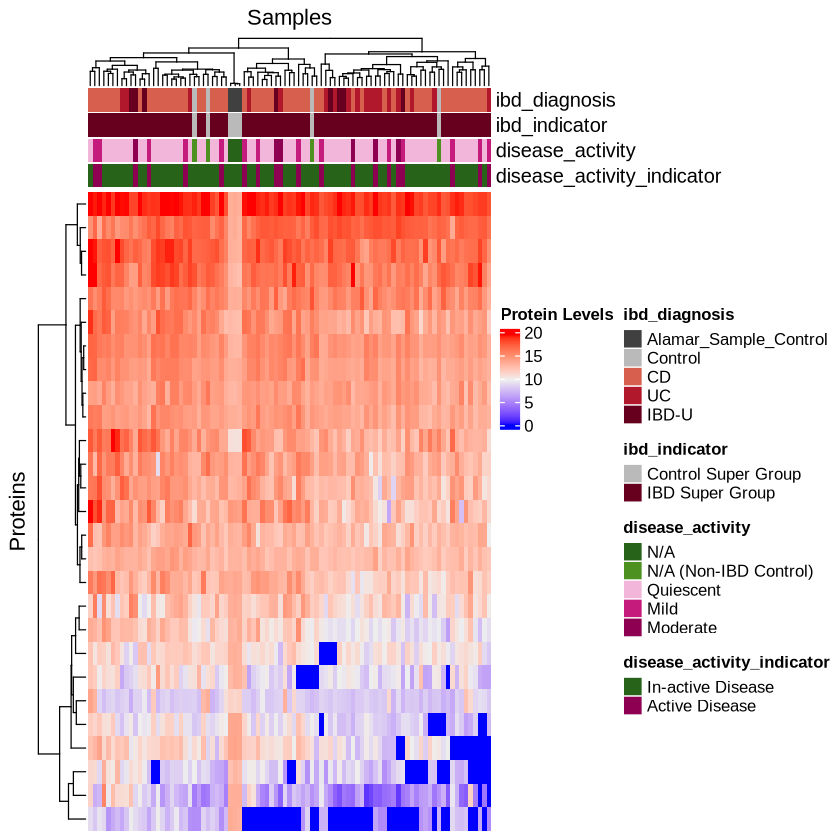

In [6]:
# Create a heatmap annotation for the diagnosis
# color brewer - https://colorbrewer2.org/#type=diverging&scheme=RdGy&n=11
ha_ibd <- HeatmapAnnotation(ibd_diagnosis = clinical_data$ibd_diagnosis,
                        col = list(ibd_diagnosis = c("Alamar_Sample_Control" = "#404040",
                                                     "Control" = "#bababa",
                                                     "CD" = "#d6604d",
                                                     "UC" = "#b2182b",
                                                     "IBD-U" = "#67001f")), which="column")

# Create a heatmap annotation for the diagnosis
ha_ibd_idx <- HeatmapAnnotation(ibd_indicator = clinical_data$ibd_indicator,
                        col = list(ibd_indicator = c("Control Super Group" = "#bababa", "IBD Super Group" = "#67001f")), which="column")

# Create a heatmap annotation for the diagnosis
# color brewer - https://colorbrewer2.org/#type=diverging&scheme=PiYG&n=5
ha_da <- HeatmapAnnotation(disease_activity = clinical_data$disease_activity, 
                        col = list(disease_activity = c("N/A" = "#276419",
                                                        "N/A (Non-IBD Control)" = "#4d9221",
                                                        "Quiescent" = "#f1b6da",
                                                        "Mild" = "#c51b7d",
                                                        "Moderate" = "#8e0152")))

# Create a heatmap annotation for the diagnosis
ha_da_idx <- HeatmapAnnotation(disease_activity_indicator = clinical_data$disease_activity_indicator, 
                        col = list(disease_activity_indicator = c("In-active Disease" = "#276419", "Active Disease" = "#8e0152")))


combined_ha = c(ha_ibd, ha_ibd_idx, ha_da, ha_da_idx) 

ht <- Heatmap(as.matrix(protein_data),
        name = "Protein Levels",
        row_title = "Proteins",
        column_title = "Samples",
        cluster_rows = TRUE,
        cluster_columns = TRUE,
        show_row_names = FALSE,
        show_column_names = FALSE,
        column_labels = clinical_data$ibd_indicator,
        top_annotation = combined_ha)

# Draw the heatmap and add a main title
ht_list <- draw(ht, heatmap_legend_side = "right", 
     annotation_legend_side = "right")

ht_grob <- grid.grabExpr(draw(ht_list))
fn = file.path(outdir, "samples.all_data.hierarchical_clustering.svg")
ggsave(fn, plot = ht_grob, width = 8, height = 6); ht_grob;

gTree[GRID.gTree.1769] 

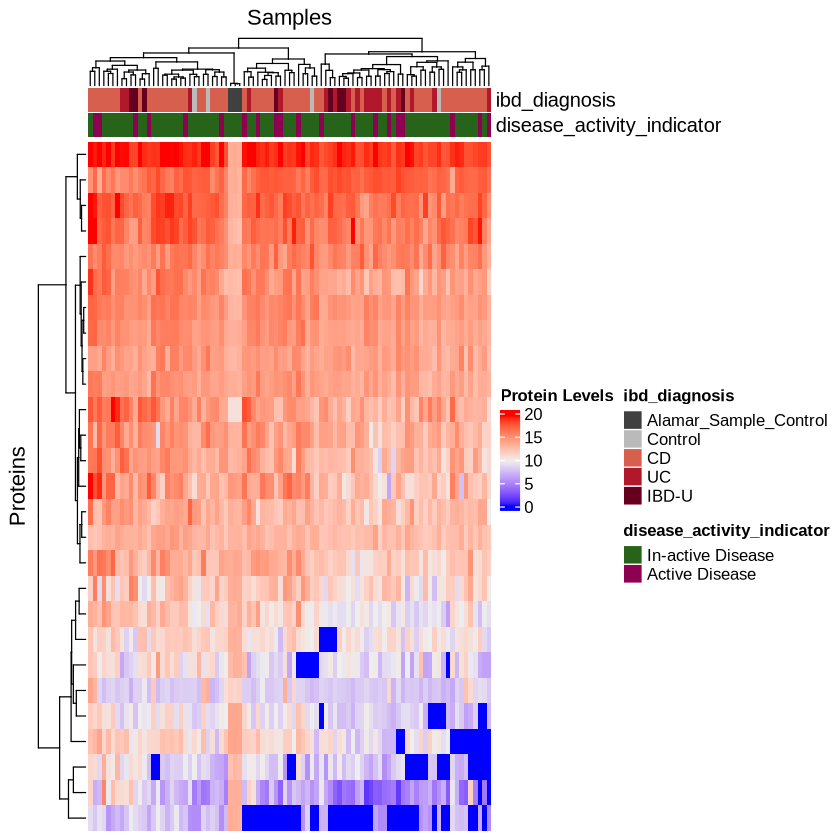

In [10]:
# Create a heatmap annotation for the diagnosis
# color brewer - https://colorbrewer2.org/#type=diverging&scheme=RdGy&n=11
ha_ibd <- HeatmapAnnotation(ibd_diagnosis = clinical_data$ibd_diagnosis,
                        col = list(ibd_diagnosis = c("Alamar_Sample_Control" = "#404040",
                                                     "Control" = "#bababa",
                                                     "CD" = "#d6604d",
                                                     "UC" = "#b2182b",
                                                     "IBD-U" = "#67001f")), which="column")

# Create a heatmap annotation for the diagnosis
ha_ibd_idx <- HeatmapAnnotation(ibd_indicator = clinical_data$ibd_indicator,
                        col = list(ibd_indicator = c("Control Super Group" = "#bababa", "IBD Super Group" = "#67001f")), which="column")

# Create a heatmap annotation for the diagnosis
# color brewer - https://colorbrewer2.org/#type=diverging&scheme=PiYG&n=5
ha_da <- HeatmapAnnotation(disease_activity = clinical_data$disease_activity, 
                        col = list(disease_activity = c("N/A" = "#276419",
                                                        "N/A (Non-IBD Control)" = "#4d9221",
                                                        "Quiescent" = "#f1b6da",
                                                        "Mild" = "#c51b7d",
                                                        "Moderate" = "#8e0152")))

# Create a heatmap annotation for the diagnosis
ha_da_idx <- HeatmapAnnotation(disease_activity_indicator = clinical_data$disease_activity_indicator, 
                        col = list(disease_activity_indicator = c("In-active Disease" = "#276419", "Active Disease" = "#8e0152")))


combined_ha = c(ha_ibd, ha_da_idx) 

ht <- Heatmap(as.matrix(protein_data),
        name = "Protein Levels",
        row_title = "Proteins",
        column_title = "Samples",
        cluster_rows = TRUE,
        cluster_columns = TRUE,
        show_row_names = FALSE,
        show_column_names = FALSE,
        column_labels = clinical_data$ibd_indicator,
        top_annotation = combined_ha)

# Draw the heatmap and add a main title
ht_list <- draw(ht, heatmap_legend_side = "right", 
     annotation_legend_side = "right")

ht_grob <- grid.grabExpr(draw(ht_list))
fn = file.path(outdir, "samples.all_data.hierarchical_clustering.simple.svg")
ggsave(fn, plot = ht_grob, width = 8, height = 6); ht_grob;

## Run hierarchical clustering on Crohn's samples only

gTree[GRID.gTree.818] 

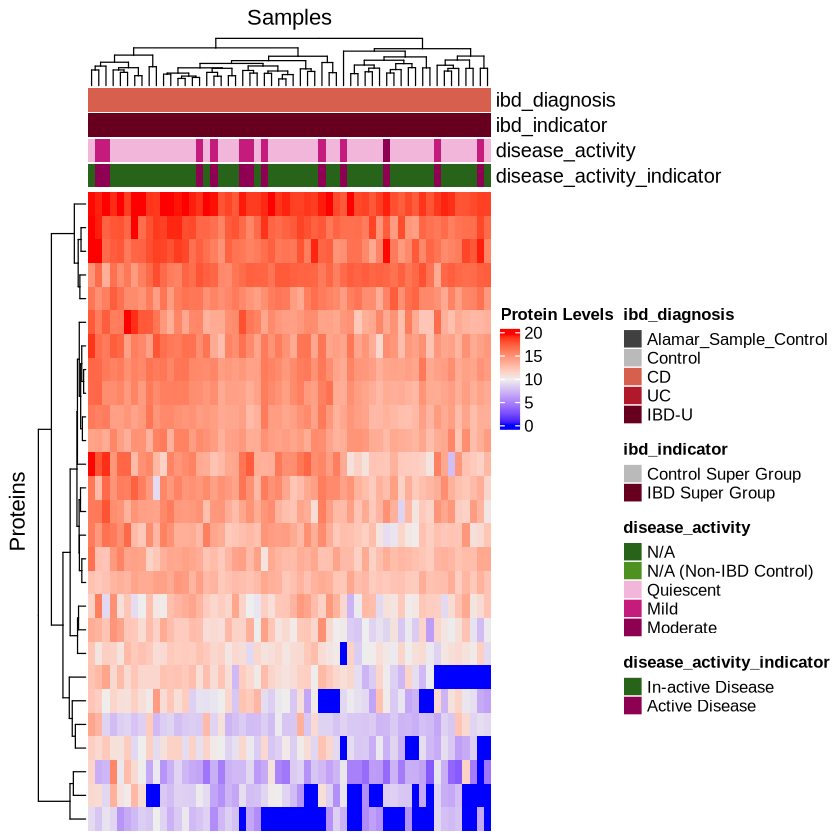

In [7]:
crohn_clinical_data <- clinical_data[clinical_data$ibd_diagnosis == "CD",]
crohn_protein_data <- protein_data[, crohn_clinical_data$sample_id]

clinical_df <- crohn_clinical_data
protein_df <- crohn_protein_data

# Create a heatmap annotation for the diagnosis
# color brewer - https://colorbrewer2.org/#type=diverging&scheme=RdGy&n=11
ha_ibd <- HeatmapAnnotation(ibd_diagnosis = clinical_df$ibd_diagnosis,
                            col = list(ibd_diagnosis = c("Alamar_Sample_Control" = "#404040",
                                                         "Control" = "#bababa",
                                                         "CD" = "#d6604d",
                                                         "UC" = "#b2182b",
                                                         "IBD-U" = "#67001f")), which="column")

# Create a heatmap annotation for the diagnosis
ha_ibd_idx <- HeatmapAnnotation(ibd_indicator = clinical_df$ibd_indicator,
                                col = list(ibd_indicator = c("Control Super Group" = "#bababa", "IBD Super Group" = "#67001f")), which="column")

# Create a heatmap annotation for the diagnosis
# color brewer - https://colorbrewer2.org/#type=diverging&scheme=PiYG&n=5
ha_da <- HeatmapAnnotation(disease_activity = clinical_df$disease_activity, 
                           col = list(disease_activity = c("N/A" = "#276419",
                                                           "N/A (Non-IBD Control)" = "#4d9221",
                                                           "Quiescent" = "#f1b6da",
                                                           "Mild" = "#c51b7d",
                                                           "Moderate" = "#8e0152")))

# Create a heatmap annotation for the diagnosis
ha_da_idx <- HeatmapAnnotation(disease_activity_indicator = clinical_df$disease_activity_indicator, 
                               col = list(disease_activity_indicator = c("In-active Disease" = "#276419", "Active Disease" = "#8e0152")))


combined_ha = c(ha_ibd, ha_ibd_idx, ha_da, ha_da_idx) 

ht <- Heatmap(as.matrix(protein_df),
              name = "Protein Levels",
              row_title = "Proteins",
              column_title = "Samples",
              cluster_rows = TRUE,
              cluster_columns = TRUE,
              show_row_names = FALSE,
              show_column_names = FALSE,
              column_labels = clinical_df$ibd_indicator,
              top_annotation = combined_ha)


# Draw the heatmap and add a main title
ht_list <- draw(ht, heatmap_legend_side = "right", 
                annotation_legend_side = "right")


ht_grob <- grid.grabExpr(draw(ht_list))
fn = file.path(outdir, "samples.crohns_data.hierarchical_clustering.png")
ggsave(fn, plot = ht_grob, width = 8, height = 6); ht_grob;

## Run hierarchical clustering on ulcerative colitis samples only

gTree[GRID.gTree.1227] 

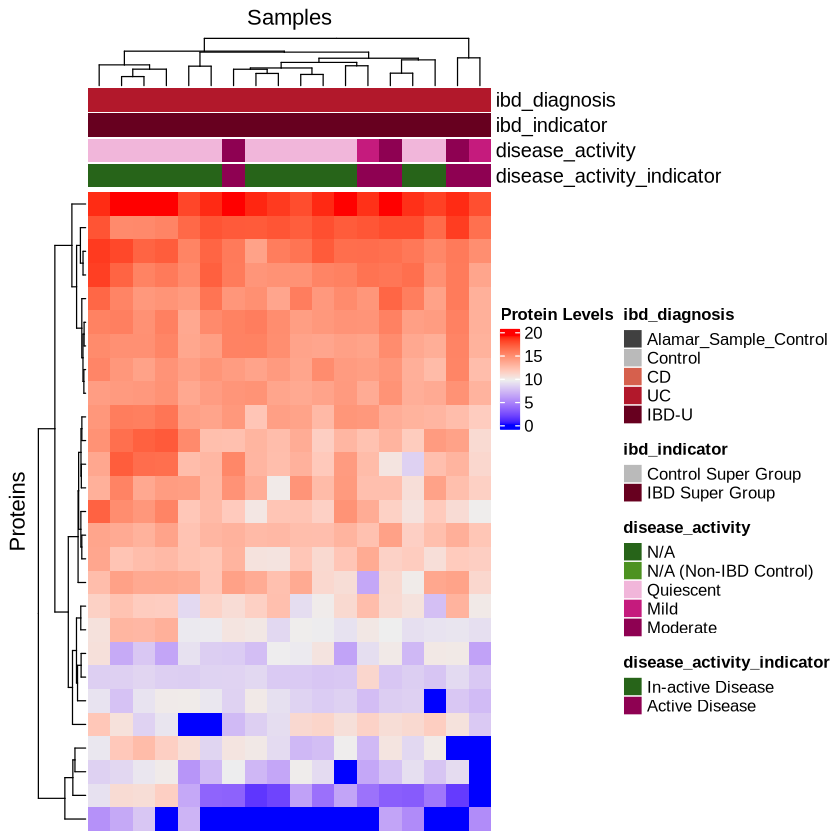

In [8]:
crohn_clinical_data <- clinical_data[clinical_data$ibd_diagnosis == "UC",]
crohn_protein_data <- protein_data[, crohn_clinical_data$sample_id]

clinical_df <- crohn_clinical_data
protein_df <- crohn_protein_data

# Create a heatmap annotation for the diagnosis
# color brewer - https://colorbrewer2.org/#type=diverging&scheme=RdGy&n=11
ha_ibd <- HeatmapAnnotation(ibd_diagnosis = clinical_df$ibd_diagnosis,
                            col = list(ibd_diagnosis = c("Alamar_Sample_Control" = "#404040",
                                                         "Control" = "#bababa",
                                                         "CD" = "#d6604d",
                                                         "UC" = "#b2182b",
                                                         "IBD-U" = "#67001f")), which="column")

# Create a heatmap annotation for the diagnosis
ha_ibd_idx <- HeatmapAnnotation(ibd_indicator = clinical_df$ibd_indicator,
                                col = list(ibd_indicator = c("Control Super Group" = "#bababa", "IBD Super Group" = "#67001f")), which="column")

# Create a heatmap annotation for the diagnosis
# color brewer - https://colorbrewer2.org/#type=diverging&scheme=PiYG&n=5
ha_da <- HeatmapAnnotation(disease_activity = clinical_df$disease_activity, 
                           col = list(disease_activity = c("N/A" = "#276419",
                                                           "N/A (Non-IBD Control)" = "#4d9221",
                                                           "Quiescent" = "#f1b6da",
                                                           "Mild" = "#c51b7d",
                                                           "Moderate" = "#8e0152")))

# Create a heatmap annotation for the diagnosis
ha_da_idx <- HeatmapAnnotation(disease_activity_indicator = clinical_df$disease_activity_indicator, 
                               col = list(disease_activity_indicator = c("In-active Disease" = "#276419", "Active Disease" = "#8e0152")))


combined_ha = c(ha_ibd, ha_ibd_idx, ha_da, ha_da_idx) 

ht <- Heatmap(as.matrix(protein_df),
              name = "Protein Levels",
              row_title = "Proteins",
              column_title = "Samples",
              cluster_rows = T,
              cluster_columns = T,
              show_row_names = FALSE,
              show_column_names = FALSE,
              column_labels = clinical_df$ibd_indicator,
              top_annotation = combined_ha)


# Draw the heatmap and add a main title
ht_list <- draw(ht, heatmap_legend_side = "right", 
                annotation_legend_side = "right")

ht_grob <- grid.grabExpr(draw(ht_list))
fn = file.path(outdir, "samples.ulcerative_colitis_data.hierarchical_clustering.png")
ggsave(fn, plot = ht_grob, width = 8, height = 6); ht_grob;